In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X = np.load('Input_data_ML.npy')
Y = np.load('Output_data_ML.npy')

In [3]:
#Normalising X
x_mean=np.mean(np.mean(X,axis=0),axis=0)
x_std=np.std(np.std(X,axis=0),axis=0)
X=(X-x_mean)/x_std


Y=Y.T

#Fixing Y[11]
Y[Y[:,11]>2*np.pi,11]=Y[Y[:,11]>2*np.pi,11]-2*np.pi
Y[Y[:,11]<0,11]=Y[Y[:,11]<0,11]+2*np.pi
#Output[:,12:]=Output[:,12:]+2.0*np.pi

X=X[:100000,:]
Y=Y[:100000,:]  

#IQR
Q1=np.quantile(Y,0.10,axis=0)
Q3=np.quantile(Y,0.90,axis=0)
IQR=Q3-Q1
X=X[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]
Y=Y[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]

#Min_Max Scaling of Y
y_min=np.min(Y,axis=0)
Y=Y-y_min
y_max=np.max(Y,axis=0)
Y=Y/y_max

print(np.shape(X),np.shape(Y))

(99988, 38) (99988, 15)


In [111]:
frac=[]

In [112]:
frac=list(frac)
eps=2
for eps in 2.0**np.arange(-2,5,0.25):
    n=np.shape(X)[0]
    N_eps=0
    t=time.time()
    for i in np.random.randint(n,size=100):
        N_eps+=np.sum(np.linalg.norm(X-X[i],axis=1)<eps)
        N_eps=N_eps/100
    print(np.round(eps,2), '\t' , N_eps, '\t', time.time()-t)
    frac.append([eps,N_eps])

0.25 	 0.010303070303030102 	 7.909421682357788
0.3 	 0.030505030703050308 	 7.848350524902344
0.35 	 0.0703030103030307 	 7.8808698654174805
0.42 	 0.030603030305080506 	 7.754249572753906
0.5 	 0.07251903050512051 	 7.890790700912476
0.59 	 0.031422120707050506 	 7.831323862075806
0.71 	 0.07070906210316091 	 7.777881145477295
0.84 	 0.07080709111509394 	 7.880200386047363
1.0 	 0.3113141109371416 	 7.858972549438477
1.19 	 0.20091020092810072 	 7.828955888748169
1.41 	 0.341417271519253 	 7.834639549255371
1.68 	 0.341827190926578 	 7.767399072647095
2.0 	 0.7267428521313035 	 7.8098461627960205
2.38 	 1.1352528397230632 	 7.828733444213867
2.83 	 4.374566404273339 	 7.848670959472656
3.36 	 0.7870893786435049 	 7.856438398361206
4.0 	 11.34467020116574 	 7.789000511169434
4.76 	 22.247946818747973 	 7.844481945037842
5.66 	 43.037459608980406 	 7.828472137451172
6.73 	 23.498381311818235 	 7.834590435028076
8.0 	 107.6023302095132 	 8.152118921279907
9.51 	 79.75075410620397 	 8.32

array([ 2.55628108, -2.02129191])

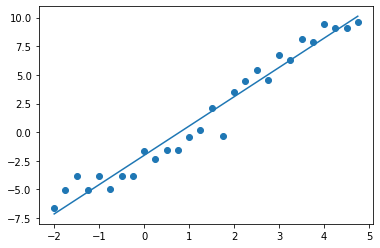

In [122]:
frac=np.array(frac)
plt.scatter(np.log2(frac[:,0]),np.log2(frac[:,1]))
pol=np.polyfit(np.log2(frac[:,0]),np.log2(frac[:,1]),1)
plt.plot(np.log2(frac[:,0]),np.polyval(pol,np.log2(frac[:,0])))
pol